In [1]:
#!pip install scipy


## Importing data

In [2]:
from scipy import io

In [3]:
table1 = io.loadmat("PreprocessedData/Commercial Movie/extr_fill_data_Test10.mat")

In [113]:
import pandas as pd
#df1 = pd.DataFrame(table1)
p = table1["GJP_student"]
x = table1["GJX_student"]
y = table1["GJY_student"]

In [114]:
import numpy as np
print(p.T[0].shape)
print(x.T[0].shape)
print(y.T[0].shape)

p = p.T[0]
x = x.T[0]
y = y.T[0]



(1290000,)
(1290000,)
(1290000,)


In [116]:
def calculate_speed(x_series, y_series):
    '''Todo: check correctness!!!'''
    x_series = np.array(x_series)
    y_series = np.array(y_series)

    previous_x = np.roll(x_series, 1)
    previous_y = np.roll(y_series, 1)

    delta_x = x_series - previous_x
    delta_y = y_series - previous_y
    
    delta_x[0] = 0
    delta_y[0] = 0

    speed = np.sqrt(delta_x**2 + delta_y**2)

    return speed

s = calculate_speed(x, y)

In [115]:
subsample_rate = 50

p_20hz = p[::subsample_rate]
x_20hz = x[::subsample_rate]
y_20hz = y[::subsample_rate]
s_20hz = calculate_speed(x_20hz, y_20hz)

In [117]:
event_boundaries = [340, 1530, 2300, 3600, 4790, 5290, 7000, 7540, 8380, 8610, 8800, 9290, 9650, 10260, 10600, 11130, 11810, 12450, 12870]
event_boundaries = list(event_boundary * (100/ subsample_rate)  for event_boundary in event_boundaries)

event_boundaries

[680.0,
 3060.0,
 4600.0,
 7200.0,
 9580.0,
 10580.0,
 14000.0,
 15080.0,
 16760.0,
 17220.0,
 17600.0,
 18580.0,
 19300.0,
 20520.0,
 21200.0,
 22260.0,
 23620.0,
 24900.0,
 25740.0]

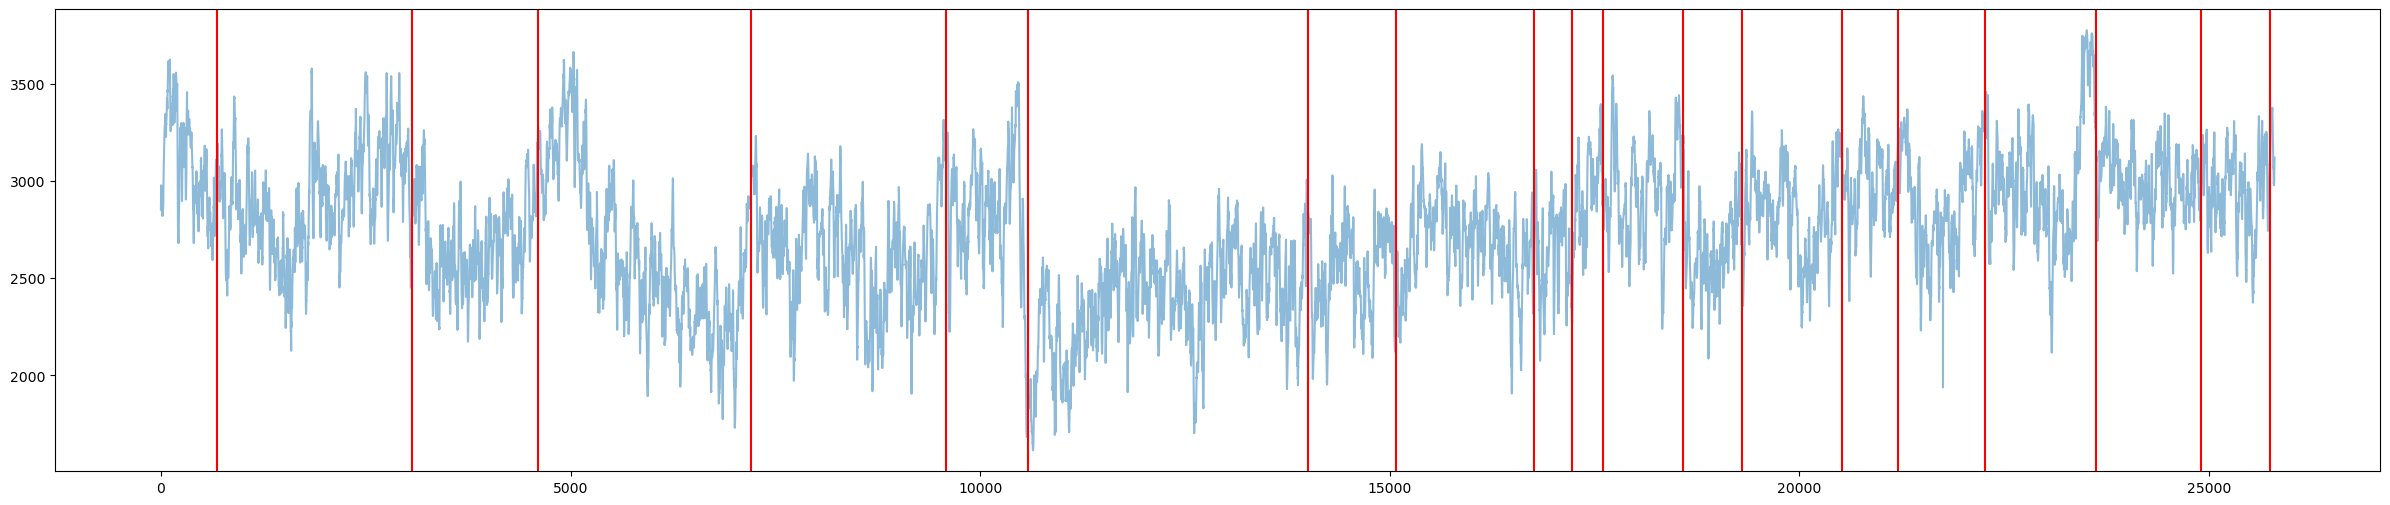

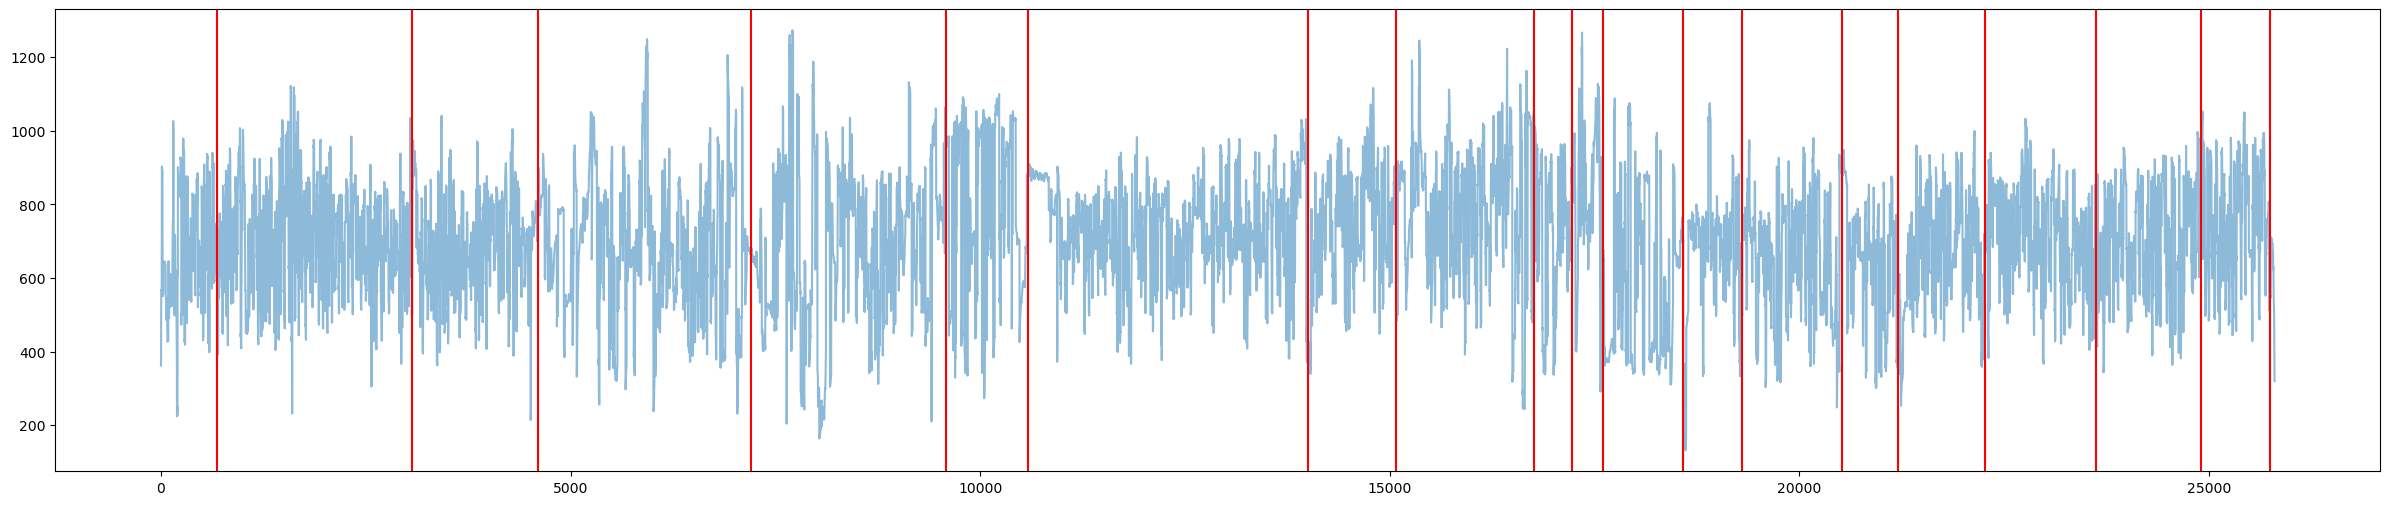

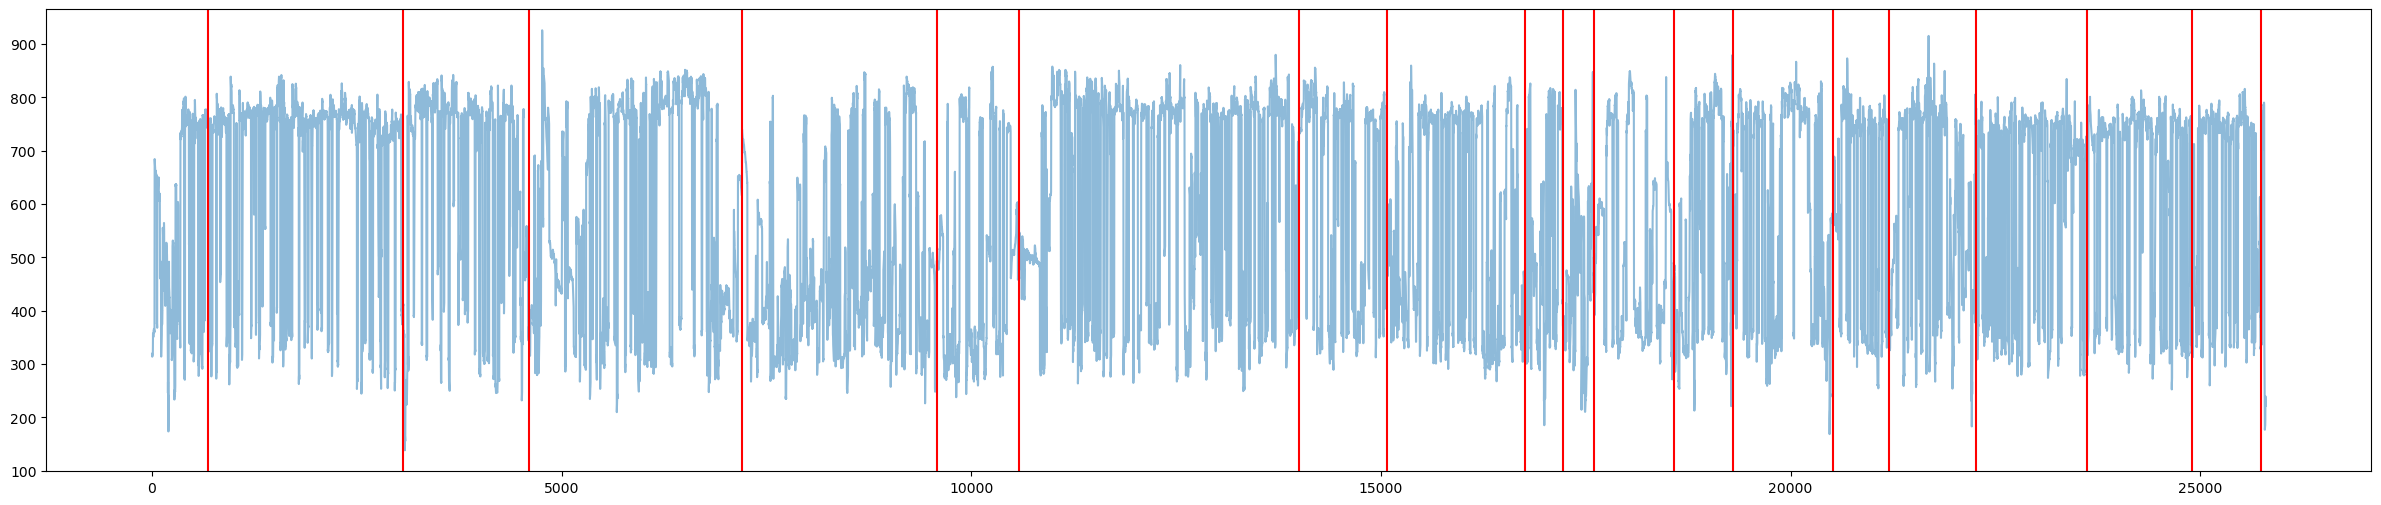

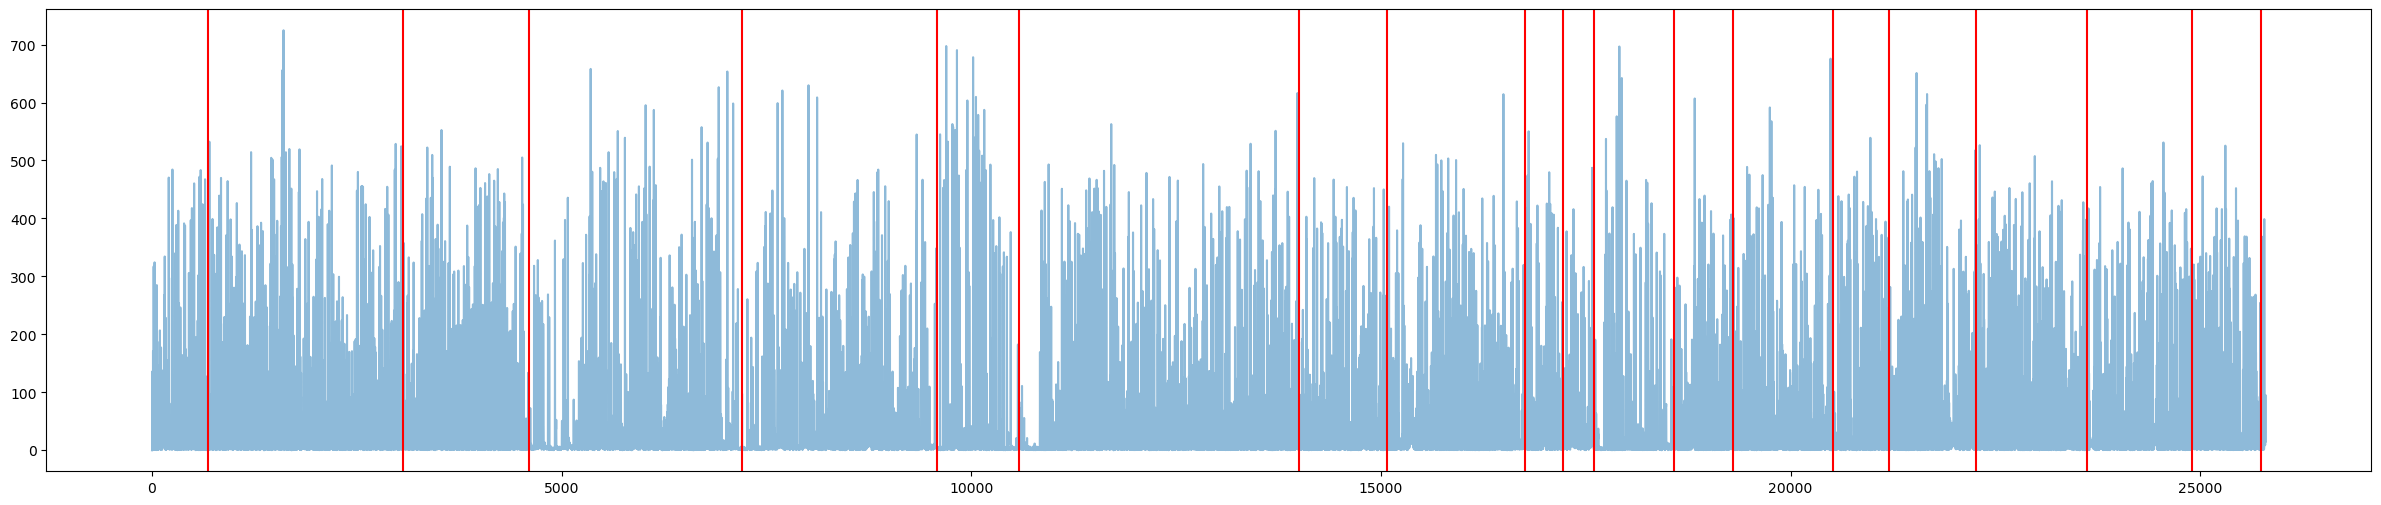

In [118]:
from matplotlib import pyplot as plt
def plot_series(series):
    figure = plt.figure(figsize=(30,6))
    plt.plot(np.arange(len(series)), series, alpha = 0.5)
    for event_boundary in event_boundaries:
        plt.axvline(event_boundary, color = "r")

plot_series(p_20hz)
plot_series(x_20hz)
plot_series(y_20hz)
plot_series(s_20hz)


680.0
3019.0
(18, 50)


Text(0.5, 1.0, 'Pupil size around the event boundary averaged over all events in 50 steps')

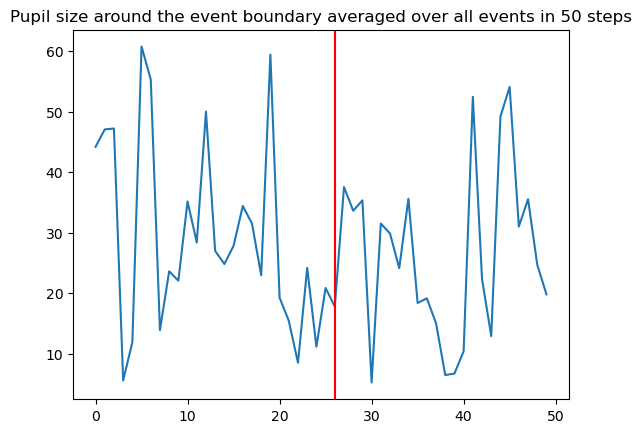

In [123]:
#data around event boundaries
import numpy as np

#for now use only even numbers 
number_time_points = 50

print(event_boundaries[0])
print(p_20hz[int(event_boundaries[0])])

time_points_around_events = np.zeros(shape = (len(event_boundaries) - 1, number_time_points))
for j, event_boundary in enumerate(event_boundaries[:-1]):
    
    for i in range(number_time_points):
        #print(j, i)
        data_around_event = s_20hz[int(event_boundary + i - number_time_points/2)]
        time_points_around_events[j, i]= data_around_event


print(np.shape(time_points_around_events))
avg_around_events = np.mean(time_points_around_events, axis = 0)
std_around_events = np.std(time_points_around_events, axis = 0)


plt.plot(avg_around_events)
#plt.plot(avg_around_events - std_around_events)
#plt.plot(avg_around_events + std_around_events)

plt.axvline(number_time_points/2 + 1, c = "r")
plt.title(f"Pupil size around the event boundary averaged over all events in {number_time_points} steps")


In [8]:
table2 = io.loadmat("PreprocessedData/Commercial Movie/extr_fill_data_Test02_20240812_202206.mat")

In [9]:
table2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec  1 00:08:56 2022',
 '__version__': '1.0',
 '__globals__': [],
 'GJP_student': array([[1075.        ],
        [1076.        ],
        [1077.        ],
        ...,
        [ 943.03151862],
        [ 942.77363897],
        [ 942.51575931]]),
 'GJX_student': array([[653.19750977],
        [653.59753418],
        [653.99755859],
        ...,
        [700.56532965],
        [700.54899724],
        [700.53266483]]),
 'GJY_student': array([[946.90246582],
        [947.00244141],
        [947.10241699],
        ...,
        [357.58452722],
        [356.93839542],
        [356.29226361]])}